In [1]:
import tensorflow as tf
from tensorflow import keras

from core.dataset import Dataset

In [3]:
train_filepath = "../data/train.csv"
valid_filepath = "../data/valid.csv"
test_filepath = "../data/test.csv"

In [4]:
train_set = Dataset.csv_to_np_dataset(train_filepath)
valid_set = Dataset.csv_to_np_dataset(valid_filepath)
test_set = Dataset.csv_to_np_dataset(test_filepath)

In [5]:
# X_train = train_set[:,:-1]
# y_train = train_set[:,-1]
# X_valid = valid_set[:,:-1]
# y_valid = valid_set[:,-1]
# X_test = test_set[:,:-1]
# y_test = test_set[:,-1]

X_train_A, X_train_B = train_set[:,:5], train_set[:,2:-1]
y_train = train_set[:,-1]
X_valid_A, X_valid_B = valid_set[:,:5], valid_set[:,2:-1]
y_valid = valid_set[:,-1]
X_test_A, X_test_B = test_set[:,:5], test_set[:, 2:-1]
y_test = test_set[:,-1]

In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler_A = StandardScaler()
# scaler_B = StandardScaler()
# X_train_A, X_train_B = scaler_A.fit_transform(X_train_A), scaler_B.fit_transform(X_train_B)
# X_valid_A, X_valid_B = scaler_A.transform(X_valid_A), scaler_B.transform(X_valid_B)
# X_test_A, X_test_B = scaler_A.transform(X_test_A), scaler_B.transform(X_test_B)

In [7]:
input_A = keras.layers.Input(shape=(5,), name="wide_input")
input_B = keras.layers.Input(shape=(6,), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# input_B = keras.layers.Input(shape=(8,), name="deep_input")
# hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# output = keras.layers.Dense(1, name="output")(hidden2)
# model = keras.Model(inputs=[input_B], outputs=[output])

In [8]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))


In [9]:
len_train = sum([1 for _ in open('../data/train.csv')])

In [10]:
print(f"X_train.dtype: {train_set.dtype}")
print(f"X_train.shape: {train_set.shape}")

X_train.dtype: float64
X_train.shape: (11610, 9)


In [120]:
# batch_size = 32
# len_train = sum([1 for _ in open('../data/train.csv')])

# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# loss = model.evaluate(X_test, y_test)

batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
356/363 [============================>.] - ETA: 0s - loss: 3.9978 - output_loss: 3.7557 - aux_output_loss: 6.1772WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x177935c10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linu

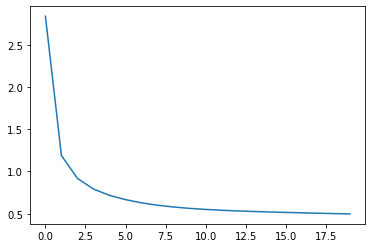

In [121]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])